In [1]:
import math, os, sys, glob
import json, csv, re, datetime
import pickle
import collections

from matplotlib import pyplot as plt
from matplotlib import cm as cm
from tqdm import tqdm

In [2]:
tweets_dataset_base = "G:/MLCV dataset/engagement'16/tweets_dataset_fixTZ"
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

category = categories_eligible[0]

In [3]:
def engage_read(category, eval_days = [90, 135, 180, 225, 270], attrs=["startDate", "days","dailyView"]):    
    with open(os.path.join(engage_dataset_base, "{}.json".format(category)), "r") as f:
        dataset_json = f.readlines()
    dataset = {}
    
    vids_set = set()
    for line in tqdm(dataset_json, desc="{} in engage".format(category)):
        record = json.loads(line)
        try:        
            day = [int(x) for x in record['insights']['days'].split(",")]                        
            if len(day) < eval_days[-1]: # filter out videos of short history
                continue                
            vals = {
                "day_zero": record['insights']['startDate'], 
                "days": day, 
                "viewCounts": [int(x) for x in record['insights']['dailyView'].split(",")],
            }
        except:
            continue
        dataset[record['id']] = vals
        
        if record['id'] in vids_set: 
            continue
        else: 
            vids_set.add(record['id'])
    print("Engage {} size: {}".format(category, len(dataset.keys())))
    return dataset

def tweets_read(category):
    with open(os.path.join(tweets_dataset_base, "{}.json".format(category)), "r") as f:
        dataset = json.load(f)
    print("Tweets {} size: {}".format(category, len(dataset.keys())))
    return dataset  

In [4]:
engage_dataset = engage_read(category)
tweets_dataset = tweets_read(category)

autos in engage: 100%|████████████████████████████████████████████████████████| 84796/84796 [00:07<00:00, 11977.47it/s]


Engage autos size: 25712
Tweets autos size: 25597


In [5]:
bins = set([(x, x+50) for x in range(-350, 50, 50)])

In [6]:
samples = {
    "vids": [],
    "engage_days": [],
    "engage_viewCounts": [],
    "tweets_days": [],
    "tweets_counts": [],
}
for vid in list(engage_dataset.keys())[:]:
    if vid not in tweets_dataset.keys(): continue
    engage_record = engage_dataset[vid]
    tweets_record = tweets_dataset[vid]
    diff_days = len(tweets_record['days']) - len(engage_record['days'])
    for one_bin in bins:
        if one_bin[0]<=diff_days<=one_bin[1]:
            samples["vids"].append(vid)
            samples["engage_days"].append(engage_record["days"])
            samples["engage_viewCounts"].append(engage_record["viewCounts"])
            samples["tweets_days"].append(tweets_record["days"])
            samples["tweets_counts"].append(tweets_record["tweets"])
            bins.remove(one_bin)                
            break
    if not bins: break
#     print(engage_record)
#     print(tweets_record)

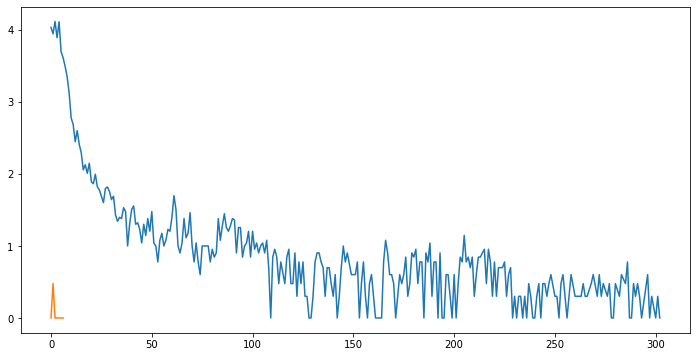

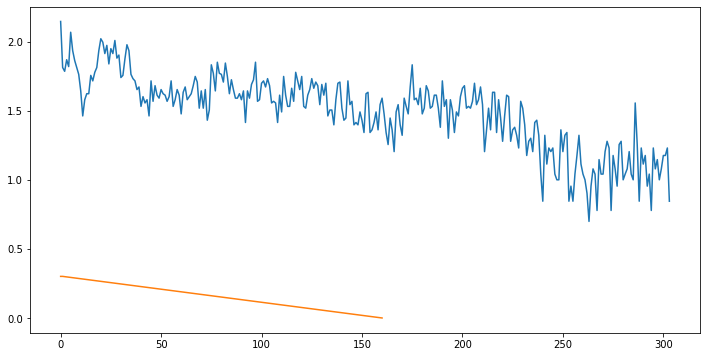

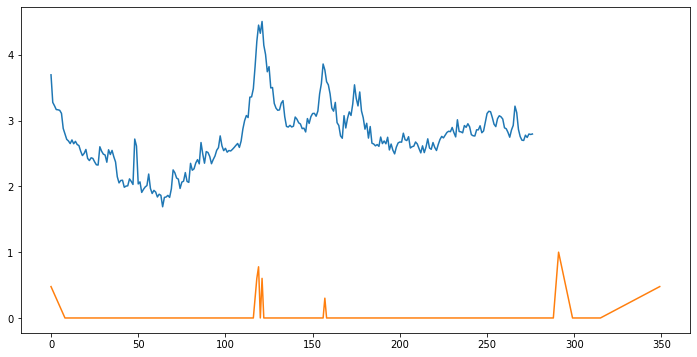

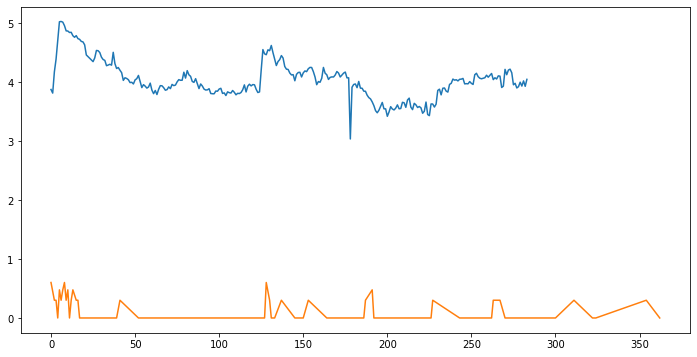

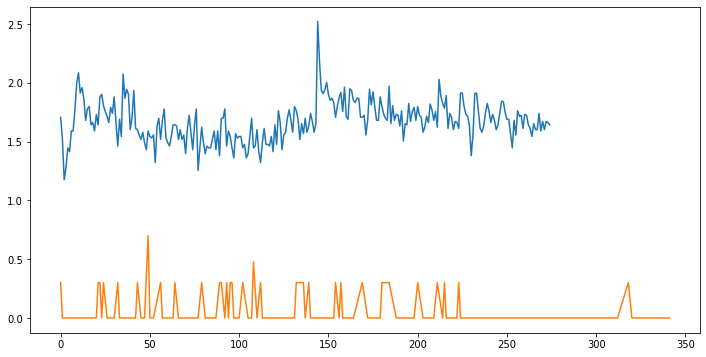

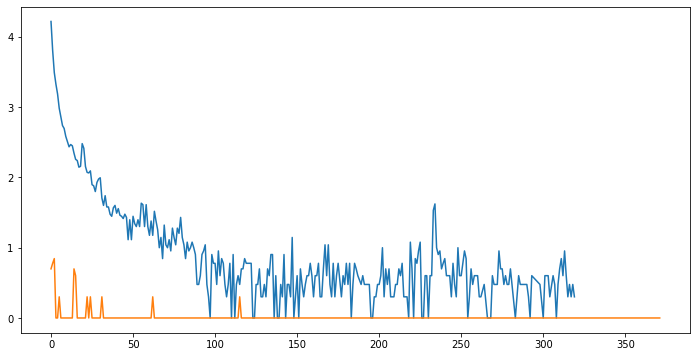

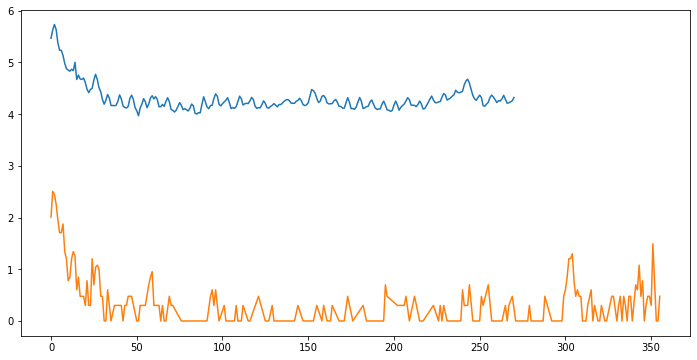

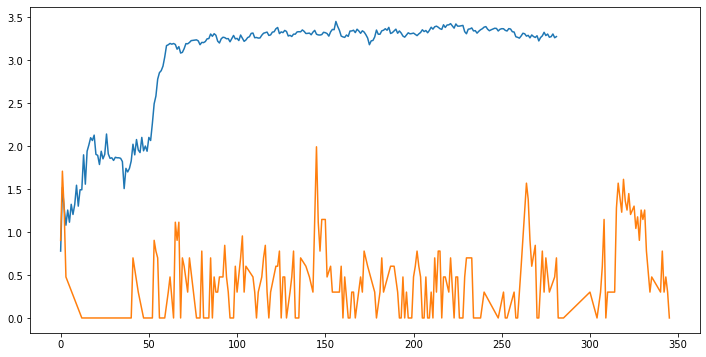

In [9]:
for i in range(len(samples["vids"])):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(samples["engage_days"][i], [math.log(x, 10) if x>0 else 0 for x in samples["engage_viewCounts"][i]])
    ax.plot(samples["tweets_days"][i], [math.log(x, 10) if x>0 else 0 for x in samples["tweets_counts"][i]])

In [14]:
for i in range(len(samples["vids"])):
    print(i, len(samples["engage_days"][i]), samples["engage_days"][i][-1])

0 285 302
1 304 303
2 277 276
3 284 283
4 275 274
5 305 319
6 271 270
7 282 281
